
*   Sistemas de presiones como regulador de los vientos y la generación de niños (anticiclon de pacifico sur)
*   Aguas calidas muy cercanas a las costas
gywanaga@unitru.edu.pe
*   Alertas biologicas en especies marinas


#Descarga de datos

## Descarga para climatología (1981-2010)

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/godas'
ftp.cwd(path)
#ftp.nlst()
year = 1981
while year<=2010:
  year1=str(year)
  filename = f"sshg.{year}.nc"
  #ftp.size(filename)
  ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
  year += 1
ftp.close()

## Descarga para anomalías

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/godas/Derived'
ftp.cwd(path)
#ftp.nlst()
#filename = "sshg.mon.ltm.1991-2020.nc"
#ftp.size(filename)
#ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)

#ftp.close()

'250 Directory successfully changed.'

In [ ]:
path = '/Datasets/godas'
ftp.cwd(path)
filename = "sshg.2016.nc"
ftp.size(filename)
ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
filename = "sshg.2017.nc"
ftp.size(filename)
ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)

'226 Transfer complete.'

# Tratamiento de datos

In [ ]:
!pip install cartopy
!pip install --no-binary shapely shapely --force

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
filename = "sshg.2017.nc"
dset = xr.open_dataset(filename)
dset

<xarray.Dataset>
Dimensions:   (lat: 418, lon: 360, time: 12)
Coordinates:
  * lon       (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float32 -74.5 -74.17 -73.83 -73.5 ... 63.5 63.83 64.17 64.5
  * time      (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2017-12-01
Data variables:
    date      (time) int32 ...
    timePlot  (time) float32 ...
    sshg      (time, lat, lon) float32 ...
Attributes: (12/13)
    creation_date:    Tue Dec 27 13:40:29 MST 2016
    sfcHeatFlux:      \nNote that the net surface heat flux are the total sur...
    time_comment:     The internal time stamp indicates the FIRST day of the ...
    Conventions:      COARDS
    grib_file:        godas.M.2017*
    html_REFERENCES:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    ...               ...
    html_GODAS:       www.cpc.ncep.noaa.gov/products/GODAS
    comment:          NOTE:  THESE ARE THE BIAS CORRECTED GODAS FILES.
    title:            GODAS: Global Ocean Data Assimilation System
    References:       https://www.psl.noaa.gov/data/gridded/data.godas.html
    dataset_title:    NCEP Global Ocean Data Assimilation System (GODAS)
    history:          Created 2016/12 by Hoop\nConverted to chunked, deflated...

In [ ]:
def normal_sshg_month(month):
  dset_month = xr.DataArray(data = 0.0,
                            dims = ['time','lat','lon'],
                            coords = dict(time = pd.date_range(f"1981-{month}-01","2010-12-01",freq='12MS'),
                                          lat = dset.lat.values,
                                          lon = dset.lon.values)
                            )

  for i in range(30):
    filename = f"sshg.{i+1981}.nc"
    dset_temp = xr.open_dataset(filename)
    dset_month[i] = dset_temp.sshg.sel(time = f"{i+1981}-{month}-01").values

  return dset_month.mean(dim='time')

#variable = dset.sshg.sel(time="2017-01-01") - dset_month

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

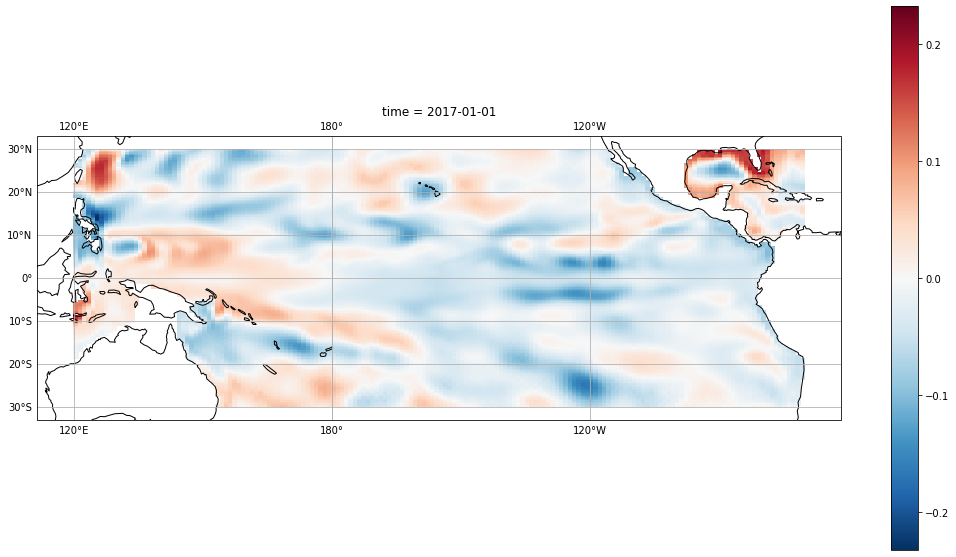

In [ ]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude=180))
anom_jan = dset.sshg.sel(time="2017-01-01") - normal_sshg_month(1)
anom_jan.sel(lat=slice(-30,30), lon = slice(120,290)).plot(ax = ax1, transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels=True)

#Centrar los graficos

##Prueba Datos en cm

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

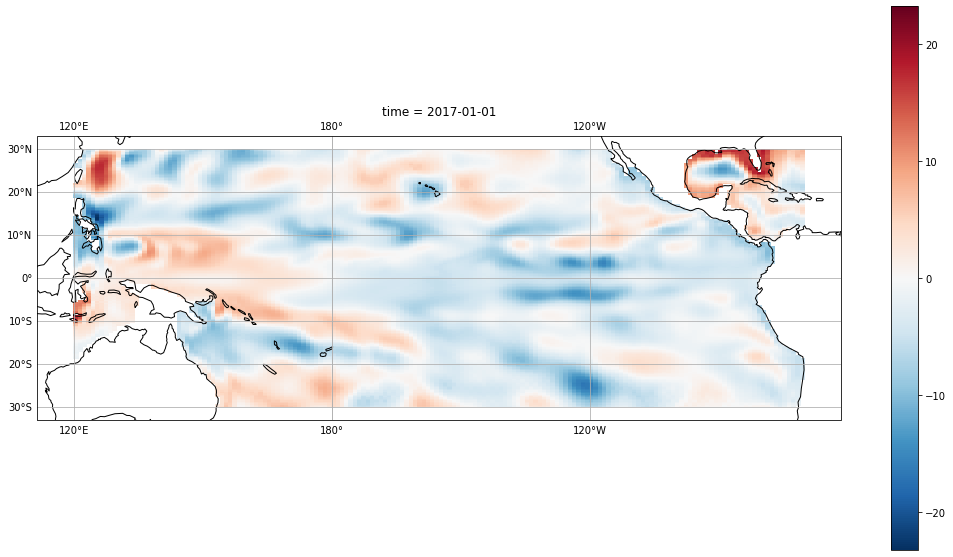

In [ ]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude=180))
anom_jan = dset.sshg.sel(time="2017-01-01") - normal_sshg_month(1)
temp_dset = anom_jan.sel(lat=slice(-30,30), lon = slice(120,290))
temp_dset.values *= 100 # Reescalado de unidades a cm
temp_dset.plot(ax=ax1, transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels=True)

#Centrar los graficos

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

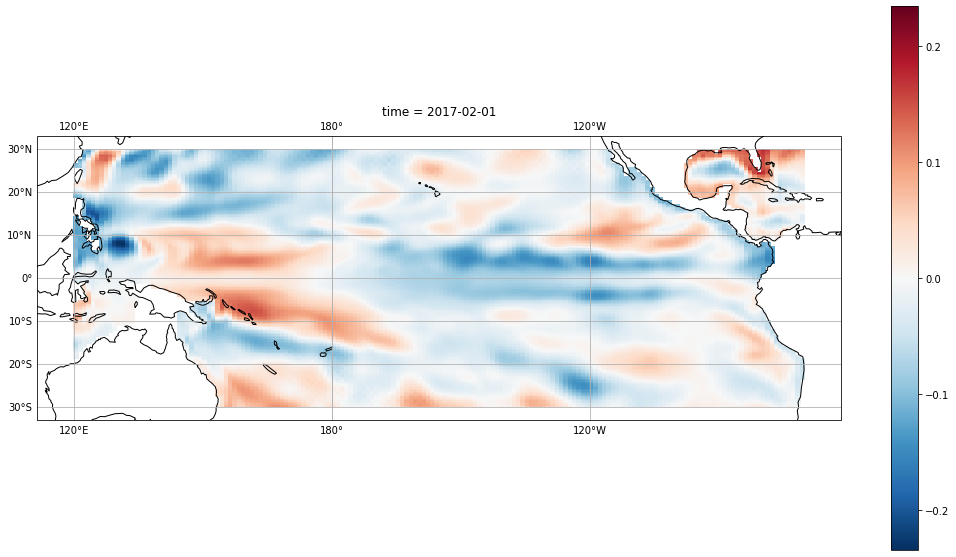

In [ ]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude=180))
anom_jan = dset.sshg.sel(time="2017-02-01") - normal_sshg_month(1)
anom_jan.sel(lat=slice(-30,30), lon = slice(120,290)).plot(ax = ax1, transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels=True)

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

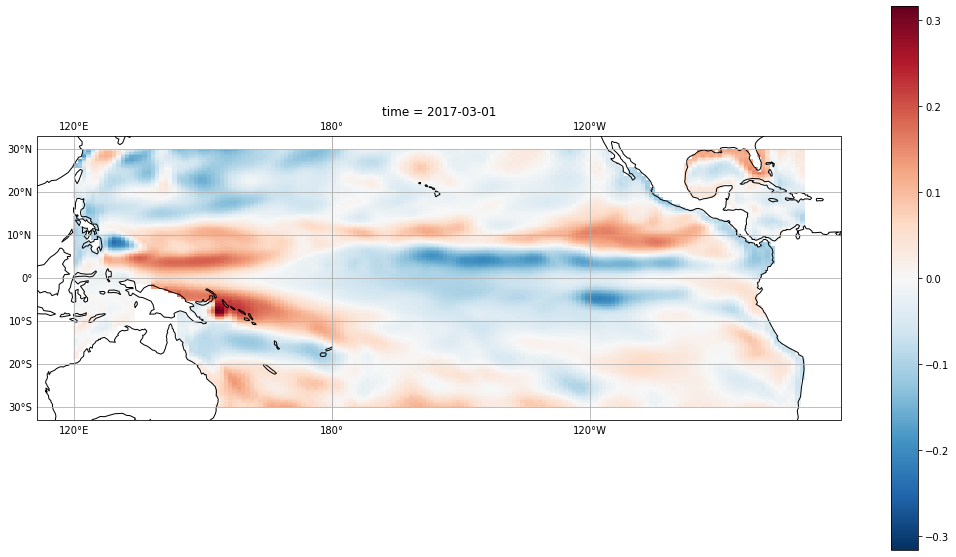

In [ ]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude=180))
anom_jan = dset.sshg.sel(time="2017-03-01") - normal_sshg_month(1)
anom_jan.sel(lat=slice(-30,30), lon = slice(120,290)).plot(ax = ax1, transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels=True)

# Sea Level Anomalies

In [ ]:
!pip install cartopy
!pip install --no-binary shapely shapely --force

## Descarga de datos

In [ ]:
from ftplib import FTP
host = 'my.cmems-du.eu'
ftp = FTP(host)
ftp.login(user='lmartinez1',passwd='Coper70618932')
ftp.getwelcome()

'220 Welcome to CMEMS MY FTP service'

### Mensuales

In [ ]:
months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
years = [2016,2017]
for year in years:
  path = f"/Core/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m/{year}"
  ftp.cwd(path)
  #ftp.nlst()
  for month in months:
    filename = f"dt_global_allsat_msla_h_y{year}_m{month}.nc"
    ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)

In [ ]:
import xarray as xr
filename = "dt_global_allsat_msla_h_y2017_m01.nc"
dset = xr.open_dataset(filename)
dset

<xarray.Dataset>
Dimensions:           (latitude: 720, longitude: 1440, nv: 2, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2017-01-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 ...
    climatology_bnds  (time, nv) datetime64[ns] ...
    lat_bnds          (latitude, nv) float32 ...
    lon_bnds          (longitude, nv) float32 ...
    sla               (time, latitude, longitude) float64 ...
Attributes: (12/42)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_duration:          P1M
    time_coverage_end:               2017-01-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             2017-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Oc...

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

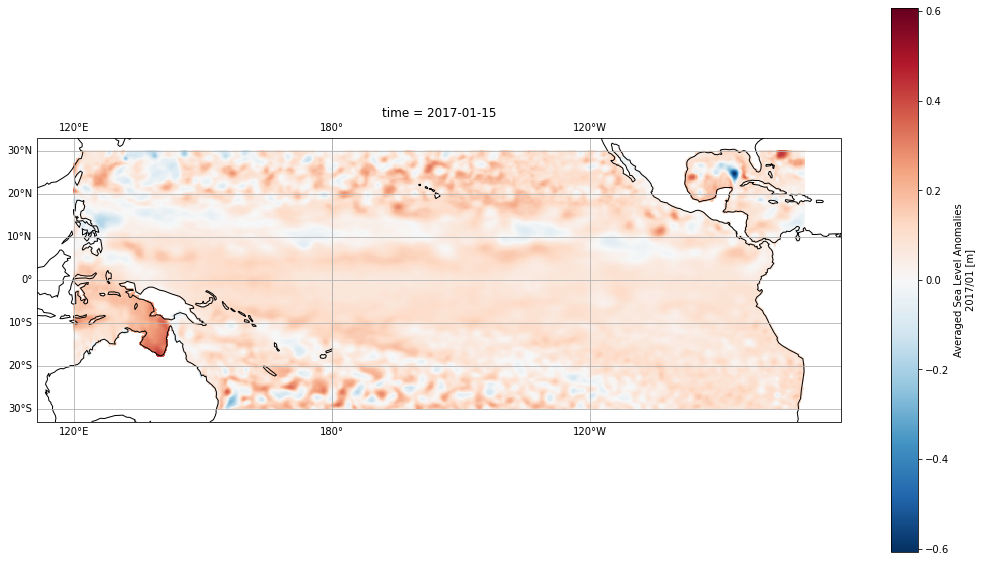

In [ ]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection = ccrs.PlateCarree(central_longitude = 180))
dset.sla.sel(time='2017-01-15', longitude = slice(120,290), latitude = slice(-30,30)).plot(ax = ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels = True)

### Diarios

In [ ]:
for x in range(9):
  filename = f"dt_global_allsat_phy_l4_2017030{x+1}_20210726.nc"
  ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
for x in range(22):
  filename = f"dt_global_allsat_phy_l4_201703{x+10}_20210726.nc"
  ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)

ftp.close()

error_perm: ignored

## Procesamiento

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

### Mensuales

In [ ]:
filename = "dt_global_allsat_msla_h_y2016_m01.nc"
dset = xr.open_dataset(filename)
date_range = pd.date_range("2016-01-01", "2017-12-31", freq="2SM")

new_lon = []
for x in dset.longitude.values:
  if x<0:
    new_lon.append(x+360)
  else:
    new_lon.append(x)

#Ejecutar una sola vez para extraer las longitudes corregidas
dset2 = dset.assign_coords(coords={"longitude": new_lon})
dset3 = dset2.sortby("longitude", True)
dset4 = dset3.sla.sel(latitude=slice(-5,5), longitude=slice(150,270)).mean(dim='latitude')
lon = dset4.longitude.values
###---------------------##########

sla_mon = xr.DataArray(data=0.0, dims=['time','lon'], coords=dict(time=date_range, lon=lon))

In [ ]:
sla_mon

In [ ]:
contador = 0
for year in years:
  for month in months:
    filename = f"dt_global_allsat_msla_h_y{year}_m{month}.nc"
    dset = xr.open_dataset(filename)
    dset2 = dset.assign_coords(coords={"longitude": new_lon})
    dset3 = dset2.sortby("longitude", True)
    sla_mon[contador] = dset3.sla.sel(time=f"{year}-{month}-15", latitude=slice(-5,5), longitude=slice(150,270)).mean(dim='latitude')
    contador += 1

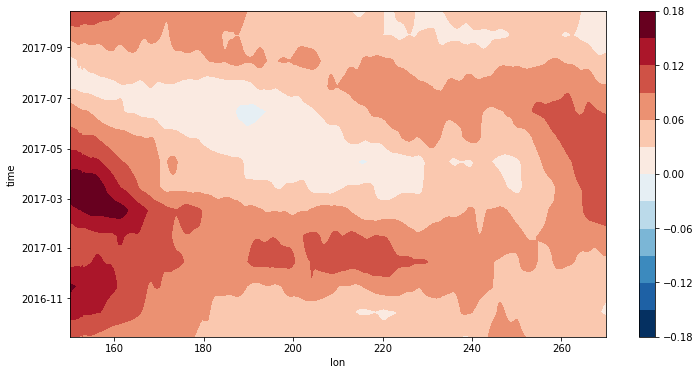

In [ ]:
fig = plt.figure(figsize=(12,6))
sla_mon.sel(time=slice("2016-09-01","2017-11-01")).plot.contourf(levels=15)#contourf(x="time",yincrease=False,levels=15)

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4665: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = asanyarray(arr)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4671: ShapelyDeprecationWarning: The array interface is d

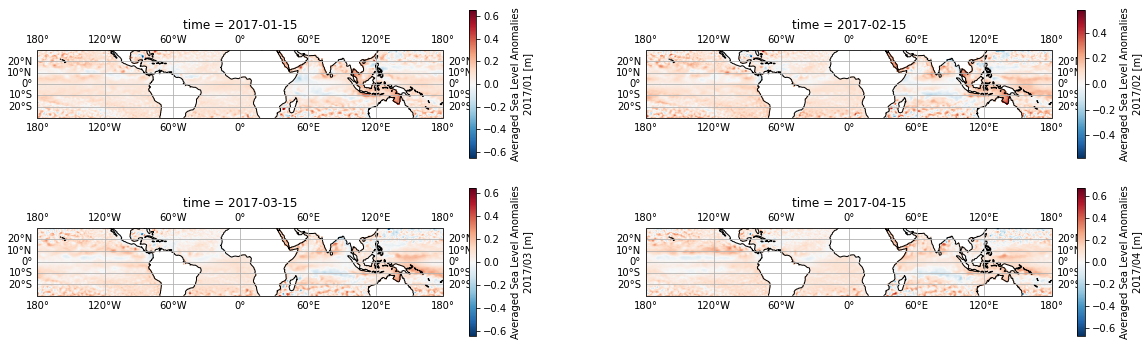

In [ ]:
filename1 = "dt_global_allsat_msla_h_y2017_m01.nc"
filename2 = "dt_global_allsat_msla_h_y2017_m02.nc"
filename3 = "dt_global_allsat_msla_h_y2017_m03.nc"
filename4 = "dt_global_allsat_msla_h_y2017_m04.nc"

fig = plt.figure(figsize=(20,6))

dset_prueba = xr.open_dataset(filename1)
ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
dset_prueba.sla.sel(latitude=slice(-30,30)).plot(ax=ax1, transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

dset_prueba = xr.open_dataset(filename2)
ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
dset_prueba.sla.sel(latitude=slice(-30,30)).plot(ax=ax2, transform=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

dset_prueba = xr.open_dataset(filename3)
ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
dset_prueba.sla.sel(latitude=slice(-30,30)).plot(ax=ax3, transform=ccrs.PlateCarree())
ax3.coastlines()
ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

dset_prueba = xr.open_dataset(filename4)
ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
dset_prueba.sla.sel(latitude=slice(-30,30)).plot(ax=ax4, transform=ccrs.PlateCarree())
ax4.coastlines()
ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

fig.savefig("SLA_JFMA2017", dpi=500, bbox_inches='tight')

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

filename = "dt_global_allsat_phy_l4_20161001_20210726.nc"
dset = xr.open_dataset(filename)
new_lon = []
for x in dset.longitude.values:
  if x<0:
    new_lon.append(x+360)
  else:
    new_lon.append(x)

#Ejecutar una sola vez para extraer las longitudes corregidas
dset2 = dset.assign_coords(coords={"longitude": new_lon})
dset3 = dset2.sortby("longitude", True)
dset4 = dset3.sla.sel(latitude=slice(-5,5), longitude=slice(150,270)).mean(dim='latitude')
lon = dset4.longitude.values
###---------------------##########
date_range = pd.date_range("2016-10-01", "2017-09-30")
sla_darray = xr.DataArray(data=0.0, dims=['time','lon'], coords=dict(time=date_range, lon=lon))

In [ ]:
sla_darray

In [ ]:
for x in range(9):
  dset = xr.open_dataset(f"dt_global_allsat_phy_l4_2017090{x+1}_20210726.nc")
  dset2 = dset.assign_coords(coords={"longitude": new_lon})
  dset3 = dset2.sortby("longitude", True)
  sla_darray[x+334] = dset3.sla.sel(time=f"2017-09-0{x+1}", latitude=slice(-5,5), longitude=slice(150,270)).mean(dim='latitude')

for x in range(21):
  dset = xr.open_dataset(f"dt_global_allsat_phy_l4_201709{x+10}_20210726.nc")
  dset2 = dset.assign_coords(coords={"longitude": new_lon})
  dset3 = dset2.sortby("longitude", True)
  sla_darray[x+343] = dset3.sla.sel(time=f"2017-09-{x+10}", latitude=slice(-5,5), longitude=slice(150,270)).mean(dim='latitude')

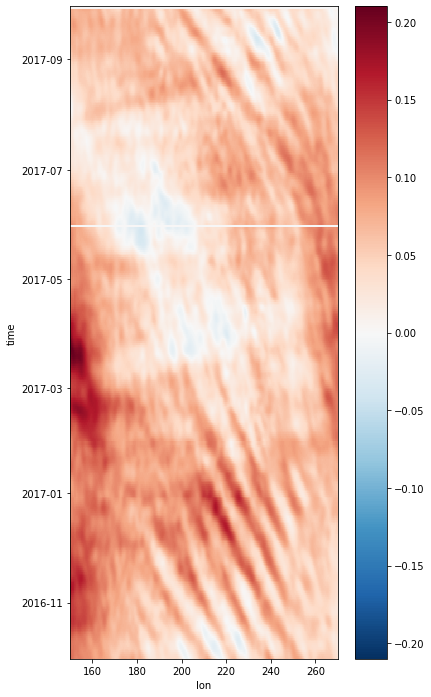

In [ ]:
fig = plt.figure(figsize=(6,12))
sla_darray.plot()

In [ ]:
dset3 = dset2.sortby("longitude", True)
dset3.sla.sel(latitude=slice(-5,5), longitude=slice(150,270)).mean(dim='latitude')

<xarray.DataArray 'sla' (time: 1, longitude: 480)>
array([[ 1.15415000e-01,  1.16060000e-01,  1.17260000e-01,
         1.17047500e-01,  1.16050000e-01,  1.14602500e-01,
         1.12612500e-01,  1.10871053e-01,  1.08292105e-01,
         1.04365000e-01,  1.02417500e-01,  1.01856757e-01,
         1.01820000e-01,  1.02360000e-01,  1.03112500e-01,
         1.04292500e-01,  1.04907500e-01,  1.05375000e-01,
         1.05385000e-01,  1.05555000e-01,  1.05057500e-01,
         1.04230000e-01,  1.02945000e-01,  1.01720000e-01,
         1.00317500e-01,  9.92200000e-02,  9.83125000e-02,
         9.81975000e-02,  9.79875000e-02,  9.78275000e-02,
         9.79400000e-02,  9.82725000e-02,  9.77275000e-02,
         9.80975000e-02,  9.77650000e-02,  9.75725000e-02,
         9.73825000e-02,  9.68700000e-02,  9.58825000e-02,
         9.49900000e-02,  9.29725000e-02,  9.09625000e-02,
         8.87475000e-02,  8.68550000e-02,  8.54000000e-02,
         8.41275000e-02,  8.34125000e-02,  8.31200000e-02,
         8.30950000e-02,  8.34950000e-02,  8.41325000e-02,
         8.48775000e-02,  8.56200000e-02,  8.66450000e-02,
         8.69300000e-02,  8.72700000e-02,  8.70950000e-02,
         8.67675000e-02,  8.63825000e-02,  8.57225000e-02,
...
         5.14600000e-02,  4.73875000e-02,  4.43350000e-02,
         4.22200000e-02,  4.08275000e-02,  4.05625000e-02,
         4.13750000e-02,  4.28400000e-02,  4.49225000e-02,
         4.73750000e-02,  4.89250000e-02,  5.02450000e-02,
         5.04650000e-02,  5.00000000e-02,  4.87925000e-02,
         4.74875000e-02,  4.64075000e-02,  4.57500000e-02,
         4.53975000e-02,  4.55225000e-02,  4.62225000e-02,
         4.75000000e-02,  4.90225000e-02,  5.03000000e-02,
         5.15350000e-02,  5.30500000e-02,  5.47300000e-02,
         5.61625000e-02,  5.73225000e-02,  5.82300000e-02,
         5.87750000e-02,  5.91550000e-02,  5.97825000e-02,
         6.00375000e-02,  5.99925000e-02,  5.92275000e-02,
         5.85525000e-02,  5.79450000e-02,  5.74275000e-02,
         5.70825000e-02,  5.65225000e-02,  5.65075000e-02,
         5.64000000e-02,  5.62950000e-02,  5.64925000e-02,
         5.67675000e-02,  5.69825000e-02,  5.69675000e-02,
         5.66950000e-02,  5.62125000e-02,  5.46200000e-02,
         5.25350000e-02,  4.95500000e-02,  4.67075000e-02,
         4.37717949e-02,  3.96641026e-02,  3.73425000e-02,
         3.57800000e-02,  3.55923077e-02,  3.29875000e-02]])
Coordinates:
  * time       (time) datetime64[ns] 2016-10-01
  * longitude  (longitude) float64 150.1 150.4 150.6 150.9 ... 269.4 269.6 269.9

In [ ]:
filename = "dt_global_allsat_phy_l4_20161001_20210726.nc"
dset = xr.open_dataset(filename)
dset

<xarray.Dataset>
Dimensions:         (latitude: 720, longitude: 1440, nv: 2, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 2016-10-01
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             int32 ...
    lat_bnds        (latitude, nv) float32 ...
    lon_bnds        (longitude, nv) float32 ...
    sla             (time, latitude, longitude) float64 ...
    err_sla         (time, latitude, longitude) float64 ...
    ugosa           (time, latitude, longitude) float64 ...
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 ...
    adt             (time, latitude, longitude) float64 ...
    ugos            (time, latitude, longitude) float64 ...
    vgos            (time, latitude, longitude) float64 ...
    flag_ice        (time, latitude, longitude) float64 ...
    tpa_correction  (time) float64 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2016-10-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2016-09-30T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...